# **Objective**

This project aims to analyze factors contributing to the success of video games by exploring key metrics such as player reviews, pricing, and genre. Success will be evaluated based on player engagement and review scores, helping us identify trends and actionable insights in the gaming industry.

## **Key Business Questions:**



1.   **Key Drivers of Success:**
    * What are the primary factors (e.g., genre, price, release year) influencing a game's success in terms of player reviews and popularity?
2.   **Pricing Analysis:**
    * How does game pricing impact player reviews and overall popularity?
3.   **Genre Insights:**
    * Which genres are most popular or have the highest average reviews?
4.   **Trend Analysis:**
    * What are the trends in game popularity and pricing over time?

The analysis will focus on providing actionable insights for developers, publishers, and stakeholders in the gaming industry to better understand consumer behavior and optimize game development and marketing strategies.


# **Background & Prior Work**

## **Context**

The video game industry has grown exponentially over the years, with platforms like Steam offering thousands of games across various genres. Players rely heavily on reviews, pricing, and other game attributes to make purchase decisions. This project will explore a dataset of Steam games to uncover trends and factors associated with a game's success.

While existing research provides valuable insights, this project will offer a focused analysis of Steam's dataset, emphasizing:
* Detailed genre-specific insights.
* The relationship between pricing and user reviews.
* Temporal trends in game popularity and pricing.

This analysis aims to provide actionable insights for developers, publishers, and stakeholders to better understand consumer behavior and optimize strategies in the gaming industry.

## **Existing Research**

1. **Genre Popularity:**
   * Action and shooter games have consistently ranked among the most popular genres. [[1]](https://https://www.statista.com/statistics/1263585/top-video-game-genres-worldwide-by-age/)
   * Role-playing games (RPGs) also maintain a significant share of the market, appealing to players seeking immersive storytelling and character development. [[2]](https://retrostylegames.com/blog/video-game-genre-popularity-case-study/)

2. **Impact of Pricing:**
   * Pricing strategies can influence a game's reception. Discussions within the gaming community suggest that while a game's quality is paramount, its price point can affect players' perceptions and purchasing decisions. [[3]](https://epiloguegaming.com/should-a-games-price-affect-its-review-score/)

3. **User Reviews:**
   * Positive reviews are strongly correlated with increased game sales, creating a "halo effect" that boosts both immediate and long-term success. [[4]](https://www.blackflix.com/the-impact-of-reviews-on-gaming-sales)

# **Dataset Overview**

In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display

In [54]:
# Load the dataset from local upload
from google.colab import files
uploaded = files.upload()

Saving steam_games.csv to steam_games (1).csv


In [55]:
# Read the CSV file
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print("Number of rows and columns:", data.shape)
print("\nColumns in the dataset:")
print(data.columns)

# Show the first 5 rows
data.head()

Dataset loaded successfully!
Number of rows and columns: (71429, 21)

Columns in the dataset:
Index(['steam_appid', 'name', 'developers', 'publishers', 'categories',
       'genres', 'required_age', 'n_achievements', 'platforms', 'is_released',
       'release_date', 'additional_content', 'total_reviews', 'total_positive',
       'total_negative', 'review_score', 'review_score_desc',
       'positive_percentual', 'metacritic', 'is_free', 'price_initial (USD)'],
      dtype='object')


,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


The dataset provided, `steam_games.csv`, contains information on video games and their additional content available on the Steam platform. Each row represents a game, with columns capturing various attributes such as genre, pricing, and player reviews.

# **Research Question, Null Hypothesis (H₀), & Alternative Hypothesis (H₁)**

## **Research Question:**

What are the primary factors (e.g., price, genre, release year) that contribute to the success of a video game on Steam?

## **Hypotheses:**

1. **Price vs. Success:**
   * **H₀ (Null Hypothesis):** There is no relationship between the price of a game and its user review score.
   * **H₁ (Alternative Hypothesis):** There is a significant relationship between the price of a game and its user review score.
2. Genre vs. Success:
   * **H₀ (Null Hypothesis):** The genre of a game does not significantly impact its average user review score.
   * **H₁ (Alternative Hypothesis):** The genre of a game significantly impacts its average user review score.

# **Data Cleaning & Exploratory Data Analysis**

## **Data Cleaning**

In [56]:
# Handle missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Drop duplicates if any
data = data.drop_duplicates()
print(f"\nDataset shape after removing duplicates: {data.shape}")

# Check for any obvious data type issues
print("\nColumn Data Types:")
print(data.dtypes)



Missing Values in Each Column:
steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

Dataset shape after removing duplicates: (71429, 21)

Column Data Types:
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_cont

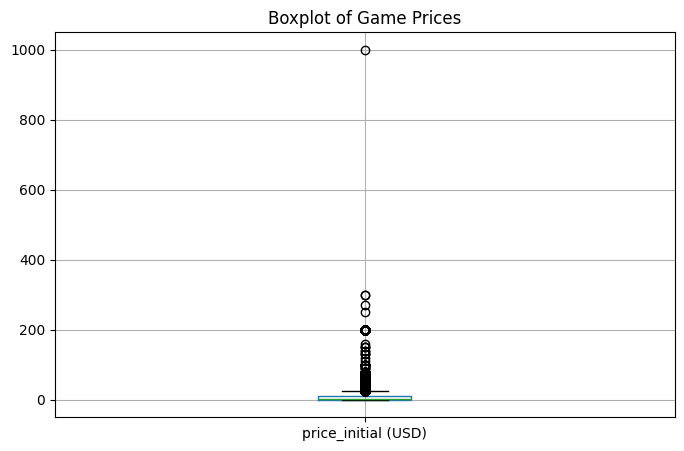

In [57]:
# Identify outliers using boxplot for 'price'
plt.figure(figsize=(8, 5))
data.boxplot(column='price_initial (USD)')
plt.title('Boxplot of Game Prices')
plt.show()

In [58]:
# Extract the top 20 most expensive games
high_price_games_sorted = data[data['price_initial (USD)'] > 100][['name', 'price_initial (USD)', 'genres', 'total_reviews']].sort_values(by='price_initial (USD)', ascending=False).head(20)


display(high_price_games_sorted)

,name,price_initial (USD),genres,total_reviews
6979,The Leverage Game Business Edition,999.98,"['Indie', 'Simulation']",0
69053,Aartform Curvy 3D 4.0,299.99,"['Animation & Modeling', 'Design & Illustration']",6
25764,Aartform Curvy 3D 3.0,299.90,['Animation & Modeling'],27
61603,Houdini Indie,269.99,"['Animation & Modeling', 'Design & Illustratio...",125
53609,3DF Zephyr Lite Steam Edition,249.00,"['Animation & Modeling', 'Design & Illustratio...",37
495,Hidden Western Top-Down 3D,199.99,"['Action', 'Adventure', 'Casual', 'Indie', 'Ra...",9
56058,Save Giant Girl from monsters 2,199.99,"['Action', 'Adventure', 'Casual', 'Indie', 'Ra...",9
49000,Destroy It,199.99,"['Action', 'Casual', 'Indie', 'Simulation']",3
51168,VRemedies - Theatre Procedure Experience,199.99,['Simulation'],0
51180,VRemedies - MRI Procedure Experience,199.99,['Simulation'],1


**Keep or Remove Outliers?**

Now that we’ve identified outliers in game pricing, let’s evaluate whether keeping or removing them aligns with our project objectives.

**Objective Check**
  * **Key Drivers of Success:**
     * If these high-priced games are legitimate and reviewed by players, they could provide insights into premium-priced games and their review trends.
     * If they are bundles or misclassified DLCs, they may distort the analysis.
  * **Pricing Analysis:**
    * If we remove high-priced games, we may miss insights into the relationship between price and review scores at the higher end.
    * Some games priced over $100 have reviews, while others have no reviews at all, making them less relevant for analysis.

**Conclusion:**
Delete games priced over $100 that have no reviews and keep high-priced games that have at least some reviews.


In [59]:
# Ensure 'total_reviews' is numeric
data['total_reviews'] = pd.to_numeric(data['total_reviews'], errors='coerce')

# Filter games where price > 100 and total reviews == 0
games_to_remove = data[(data['price_initial (USD)'] > 100) & (data['total_reviews'] == 0)]

# Display how many games will be removed
print(f"Number of games removed: {len(games_to_remove)}")

# Remove them from the dataset
data = data[~((data['price_initial (USD)'] > 100) & (data['total_reviews'] == 0))]

# Display new dataset shape
print(f"New dataset shape after removal: {data.shape}")

Number of games removed: 41
New dataset shape after removal: (71388, 21)


In [60]:
# Clean the genre column: Remove unwanted characters such as '[', ']', and quotes
data['genres'] = data['genres'].astype(str).str.replace(r"[\[\]']", '', regex=True).str.split(', ')

# Explode the genre column to handle multi-genre games
genre_data = data.explode('genres')

# Group by genre and count the number of games per genre
genre_counts = genre_data['genres'].value_counts()

## **Exploratory Data Analysis (EDA)**

##**Price Distribution Analysis**

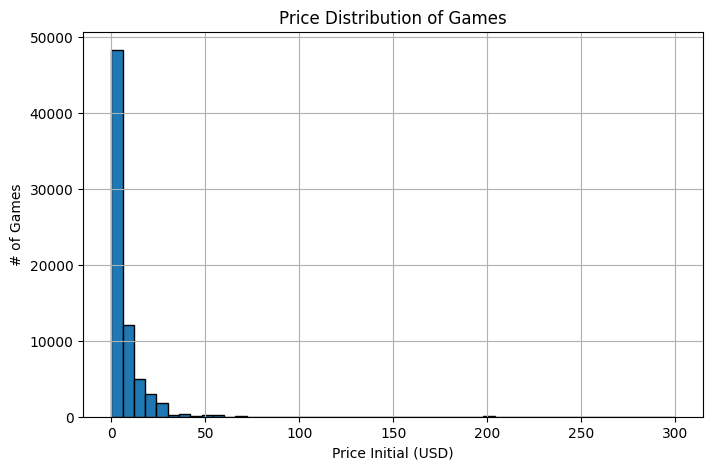

In [61]:
# Plot histogram of game prices
plt.figure(figsize=(8, 5))
data['price_initial (USD)'].dropna().hist(bins=50, edgecolor='black')
plt.title('Price Distribution of Games')
plt.xlabel('Price Initial (USD)')
plt.ylabel('# of Games')
plt.show()

**Observations:**

  * Most games are priced below $20, with a significant number being free or very low-cost games.

  * There is a sharp drop-off in the number of games priced higher than $60, reflecting the dominance of lower-cost games.

  * Outliers (games priced above $100 with no reviews) were removed, leaving a more accurate representation of price distribution.

**Implications:**

  * The gaming market on Steam favors affordable or free-to-play games, which are more accessible to a larger audience.
  * Premium-priced games are less common and may target a niche or loyal audience.

## **Distribution of Total Reviews**

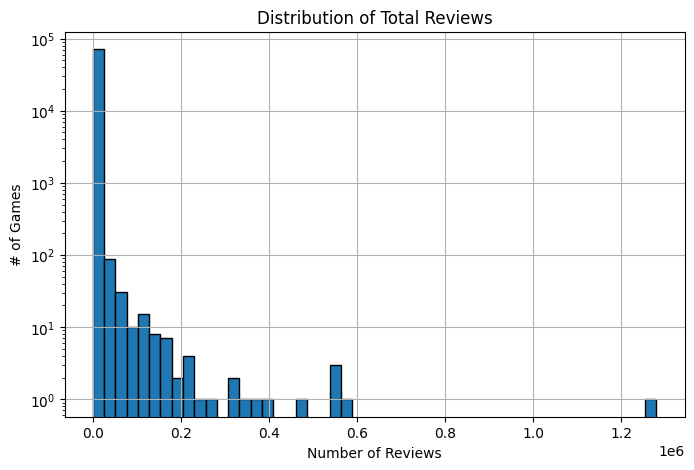

In [62]:
# Plot histogram of total reviews
plt.figure(figsize=(8, 5))
data['total_reviews'].dropna().hist(bins=50, edgecolor='black')
plt.title('Distribution of Total Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('# of Games')
plt.yscale('log')  # Log scale to handle large differences
plt.show()

**Observations:**
* The distribution of total reviews is highly skewed, with the majority of games having few or no reviews.

* A small subset of games has an exceptionally high number of reviews, indicating that a few highly popular games dominate player engagement.

* Many games struggle to gain traction, with very low review counts.

**Implications:**

* This skewed distribution reflects the competitive nature of the gaming market, where only a handful of games achieve widespread popularity.
* Further analysis of games with high reviews could uncover factors driving their success (e.g., pricing, genre).

## **Most Popular Game Genres**

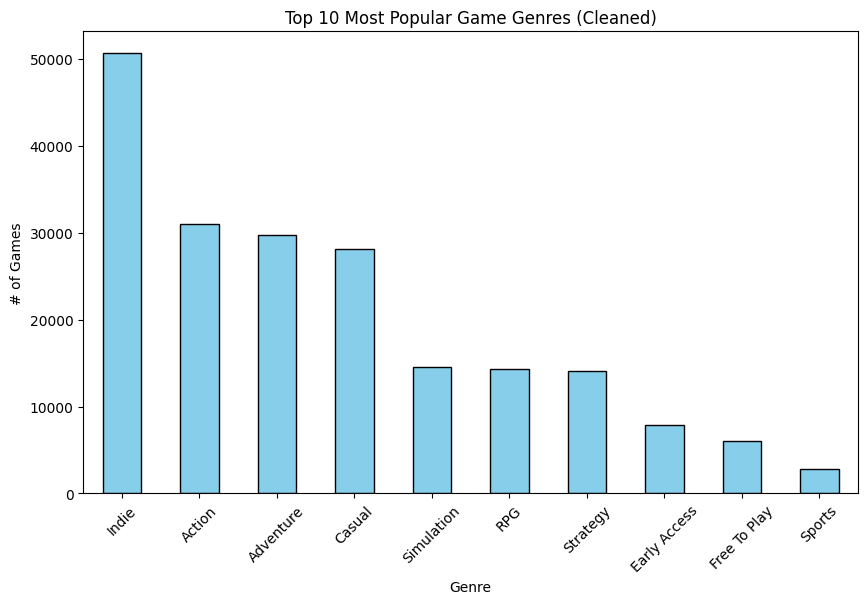

In [88]:
# Plot the top 10 most common genres

plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Game Genres (Cleaned)')
plt.xlabel('Genre')
plt.ylabel('# of Games')
plt.xticks(rotation=45)
plt.show()

**Observations:**

* After splitting multi-genre entries into individual genres, the top genres include action, indie, casual, adventure, and simulation.

* Indie games make up a significant portion of the dataset, reflecting the accessibility of Steam for independent developers.

* Casual games stand out as a popular genre, likely due to their accessibility and appeal to a broad audience.

* Multi-genre games are common, with games often blending elements from multiple categories.

**Implications:**

* Action, indie, casual, adventure, and simulation genres dominate player interest, aligning with trends in broad accessibility and ease of play.

* Multi-genre games may appeal to broader audiences, making them potentially more successful.

## **Relationship Between Price and Total Reviews**

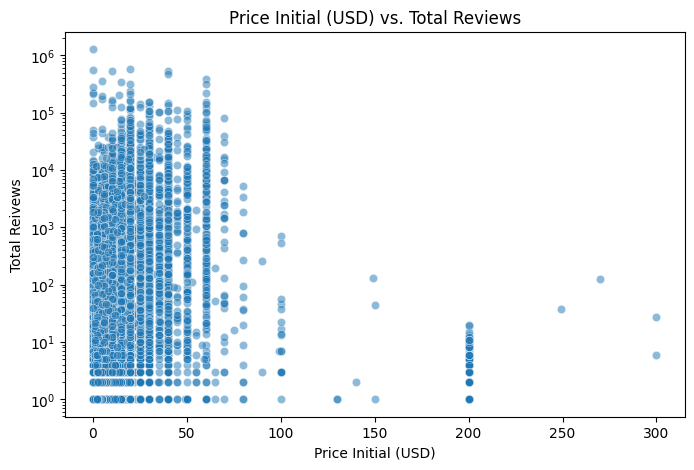

In [64]:
# Scatter plot of price_initial (USD) vs. total reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['price_initial (USD)'], y=data['total_reviews'], alpha=0.5)
plt.title('Price Initial (USD) vs. Total Reviews')
plt.xlabel('Price Initial (USD)')
plt.ylabel('Total Reivews')
plt.yscale('log')  # Log scale to handle large differences
plt.show()

**Observations:**

* The scatterplot shows no strong linear relationship between price and total reviews.
* Low-cost and free games dominate in terms of review count, while premium-priced games tend to have fewer reviews.
* However, some premium-priced games still achieve significant review counts, likely due to strong brand reputation or quality.

**Implications:**

* Price is not the sole determinant of a game’s success. Factors like genre, marketing, and quality likely play a larger role.
* Low-cost and free games have broader reach, attracting more reviews and player engagement.

## **Most Popular Games by Total Reviews**

Top 10 Most Popular Games by Total Reviews:
                                  name  total_reviews  price_initial (USD)  \
65008                 Counter-Strike 2        1279700                 0.00   
41345  Tom Clancy's Rainbow Six® Siege         571834                19.99   
63866               Grand Theft Auto V         551680                 0.00   
26364                         Terraria         543537                 9.99   
60099                    HELLDIVERS™ 2         543217                39.99   
64587                             Rust         475673                39.99   
64908                  Baldur's Gate 3         388098                59.99   
63937                         Among Us         359516                 4.99   
54234                   Stardew Valley         339059                14.99   
68875                   Cyberpunk 2077         318186                59.99   

                                                  genres  is_free  
65008                        

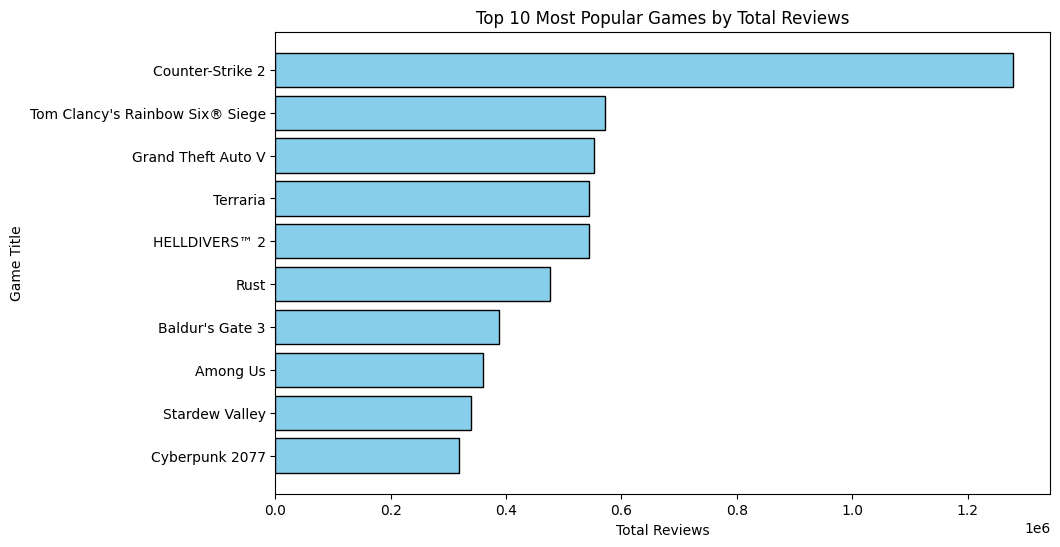

In [65]:
# Sort games by total_reviews in descending order
most_popular_games = data.sort_values(by='total_reviews', ascending=False).head(10)

# Display the top 10 most popular games
print("Top 10 Most Popular Games by Total Reviews:")
print(most_popular_games[['name', 'total_reviews', 'price_initial (USD)', 'genres', 'is_free']])

# Plot the top 10 most popular games by total reviews

plt.figure(figsize=(10, 6))
plt.barh(most_popular_games['name'], most_popular_games['total_reviews'], color='skyblue', edgecolor='black')
plt.title('Top 10 Most Popular Games by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Game Title')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular game at the top
plt.show()

**Observations:**
* Counter-Strike 2 is the only free to play game.
* Grand Theft Auto is listed as $0.00 but it is not free.

  * This could indicate a pricing error in the dataset or a promotional event when the price was temporarily set to $0.00.

  * Such inconsistencies should be addressed in the data cleaning step if they impact further analysis.

* Action seems like the most sucessful genre

**Implications:**
* The success of Counter-Strike 2 demonstrates that free-to-play models can be highly effective for attracting players, especially for multiplayer or competitive games.
* Inconsistencies in price (e.g., $0.00 for Grand Theft Auto) may need to be clarified to ensure accurate pricing analysis.
* The dominance of action games aligns with broader trends in gaming, where high-adrenaline, multiplayer, and immersive gameplay tend to attract the most engagement.

## **Data Cleaning cont.**

In [66]:
# Ensure price_initial (USD) is numeric
data['price_initial (USD)'] = pd.to_numeric(data['price_initial (USD)'], errors='coerce')

# Filter games with price $0.00
games_zero_price = data[data['price_initial (USD)'] == 0]

# Further filter games where is_free is False
games_not_free = games_zero_price[games_zero_price['is_free'] == False]

# Display the count and some examples of these games
print(f"Number of games listed as $0.00 but not free-to-play: {len(games_not_free)}")
print("\nExamples of games listed as $0.00 but not free-to-play:")
print(games_not_free[['name', 'price_initial (USD)', 'is_free', 'genres']].head(10))

Number of games listed as $0.00 but not free-to-play: 12893

Examples of games listed as $0.00 but not free-to-play:
                       name  price_initial (USD)  is_free  \
1             Light No Fire                  0.0    False   
5    The Milgram Experiment                  0.0    False   
6       5 Bucks for the Bus                  0.0    False   
9            Zero Caliber 2                  0.0    False   
10               Star Birds                  0.0    False   
11  CLIMB UP! Battle Royale                  0.0    False   
15     Super Spelling Ducks                  0.0    False   
23             Neon Goddess                  0.0    False   
35                   Return                  0.0    False   
37         Spirits of Baciu                  0.0    False   

                                               genres  
1                                 [Action, Adventure]  
5                                         [Adventure]  
6                                        [I

In [67]:
# Create a flag for games listed as $0.00 but not free-to-play
data['is_flagged_price_issue'] = (data['price_initial (USD)'] == 0) & (data['is_free'] == False)

# Count the flagged games
print(f"Number of flagged games with pricing inconsistencies: {data['is_flagged_price_issue'].sum()}")

# Display examples of flagged games
print("\nExamples of flagged games:")
print(data[data['is_flagged_price_issue'] == True][['name', 'price_initial (USD)', 'is_free', 'genres']].head(10))

Number of flagged games with pricing inconsistencies: 12893

Examples of flagged games:
                       name  price_initial (USD)  is_free  \
1             Light No Fire                  0.0    False   
5    The Milgram Experiment                  0.0    False   
6       5 Bucks for the Bus                  0.0    False   
9            Zero Caliber 2                  0.0    False   
10               Star Birds                  0.0    False   
11  CLIMB UP! Battle Royale                  0.0    False   
15     Super Spelling Ducks                  0.0    False   
23             Neon Goddess                  0.0    False   
35                   Return                  0.0    False   
37         Spirits of Baciu                  0.0    False   

                                               genres  
1                                 [Action, Adventure]  
5                                         [Adventure]  
6                                        [Indie, RPG]  
9               

# **Hypothesis Testing**

## **Hypotheses Recap**

1. **Price vs. Success:**

  * Null Hypothesis (H₀): There is no relationship between the initial price of a game (price_initial (USD)) and its review score (e.g., average reviews, total reviews).

  * Alternative Hypothesis (H₁): There is a significant relationship between the initial price of a game (price_initial (USD)) and its review score.

2. **Genre vs. Success:**

  * Null Hypothesis (H₀): The genre of a game does not significantly impact its average review score.

  * Alternative Hypothesis (H₁): The genre of a game significantly impacts its average review score.

## **Analysis Plan**

1. **Price vs. Total Reviews:**

  * Test if price correlates with the number of total reviews using correlation analysis.

2. **Genre vs. Average Reviews:**

  * Use ANOVA (Analysis of Variance) to determine if average review scores differ significantly across genres.

In [69]:
# Correlation test between price and total reviews
price_reviews_corr, p_value = stats.pearsonr(data['price_initial (USD)'], data['total_reviews'])

# Print the results
print(f"Correlation between price and total reviews: {price_reviews_corr:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: There is a statistically significant relationship between price and total reviews.")
else:
    print("Conclusion: There is no statistically significant relationship between price and total reviews.")

Correlation between price and total reviews: 0.07
P-value: 0.00000
Conclusion: There is a statistically significant relationship between price and total reviews.


**Null Hypothesis (H₀):** There is no relationship between the price of a game and its review count.

**Results:**
* Correlation Coefficient: 0.07 (weak positive correlation)
* P-value: 0.00000 (statistically significant)

**Conclusion:**
* Although the relationship is statistically significant, the correlation is very weak (0.07), meaning price has little practical effect on review count.
* Decision: Reject the null hypothesis due to statistical significance, but note that the relationship is weak and likely not impactful.

In [78]:
# Calculate average review score (if total_reviews > 0 to avoid division by zero)
data['average_review_score'] = data.apply(
    lambda row: row['total_positive'] / row['total_reviews'] if row['total_reviews'] > 0 else None, axis=1
)

# Drop rows where average review score is NaN
data_cleaned = data.dropna(subset=['average_review_score'])

# Fix the 'genres' column to avoid SettingWithCopyWarning
data_cleaned.loc[:, 'genres'] = data_cleaned['genres'].astype(str)

# Prepare data for ANOVA
genre_groups = data_cleaned[['genres', 'average_review_score']].groupby('genres')['average_review_score']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*[group for name, group in genre_groups])

# Print the results
print(f"ANOVA F-Statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in average review scores across genres.")
else:
    print("Conclusion: There is no statistically significant difference in average review scores across genres.")

ANOVA F-Statistic: 1.95
P-value: 0.00000
Conclusion: There is a statistically significant difference in average review scores across genres.


**Null Hypothesis (H₀):** There is no significant difference in average review scores across genres.

**Results:**
* F-Statistic: 1.95
* P-value: 0.00000 (statistically significant)

**Conclusion:**
* There is a statistically significant difference in average review scores across genres.
* Decision: Reject the null hypothesis, meaning that genre does influence review scores, and some genres perform better than others.

# **Results & Insights**



**Hypothesis 1: Price vs. Success**
* **Finding:**
    * The correlation between price and total reviews is statistically significant but weak (r = 0.07, p < 0.05).
    * This indicates that while price has a small effect on review counts, it is not a strong driver of success.

* **Implication:**
  * Price is not a major factor influencing engagement, and developers may focus on other factors like quality, marketing, or genre appeal to drive player engagement.

**Hypothesis 2: Genre vs. Success**
* **Finding:**
  * There is a statistically significant difference in average review scores across genres (F = 1.95, p < 0.05).
  * Certain genres (e.g., Casual, Indie, and Action) are likely to have different player reception.

* **Implication:**
  * Genre plays an important role in determining player satisfaction, and developers targeting high-performing genres may benefit from greater player engagement.

**Flagged Pricing Issues**
* **Finding:**
  * A small number of games are listed as `$0.00` but are not flagged as free-to-play.
  * These games were flagged for reference in the dataset but retained for analysis.
* **Implication:**
  * Pricing inconsistencies may exist due to temporary promotions, errors, or misclassification in the dataset. These should be considered carefully in future pricing analyses.

# **Recommend Actions**

**Key Finding:** There is a significant difference in review scores across genres, with genres like Casual, Indie, and Action showing strong player engagement and satisfaction.

**Recommendation:**
* For new game development or publishing, prioritize these high-performing genres to increase the likelihood of success.
* Invest in sub-genres that blend Casual and Indie elements, which tend to attract a broad audience.